In [1]:
import torch
import jovian
import torchvision
import matplotlib
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

<IPython.core.display.Javascript object>

In [2]:
dataframe_raw = pd.read_csv('winequalityred.csv',delimiter = ';')

In [3]:
dataframe_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
dataframe_raw.shape

(1599, 12)

In [5]:
input_cols = list(dataframe_raw.columns)[:-1]
output_cols = ['quality']
input_cols,output_cols

(['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol'],
 ['quality'])

In [6]:
def dataframe_to_arrays(dataframe):
    dataframe1 = dataframe_raw.copy(deep=True)
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array

In [7]:
inputs_array, targets_array = dataframe_to_arrays(dataframe_raw)
inputs_array, targets_array

(array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
        [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
        [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
        ...,
        [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
        [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
        [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]]),
 array([[5],
        [5],
        [5],
        ...,
        [6],
        [5],
        [6]], dtype=int64))

In [8]:
inputs = torch.from_numpy(inputs_array).type(torch.float)
targets = torch.from_numpy(targets_array).type(torch.float)
inputs,targets

(tensor([[ 7.4000,  0.7000,  0.0000,  ...,  3.5100,  0.5600,  9.4000],
         [ 7.8000,  0.8800,  0.0000,  ...,  3.2000,  0.6800,  9.8000],
         [ 7.8000,  0.7600,  0.0400,  ...,  3.2600,  0.6500,  9.8000],
         ...,
         [ 6.3000,  0.5100,  0.1300,  ...,  3.4200,  0.7500, 11.0000],
         [ 5.9000,  0.6450,  0.1200,  ...,  3.5700,  0.7100, 10.2000],
         [ 6.0000,  0.3100,  0.4700,  ...,  3.3900,  0.6600, 11.0000]]),
 tensor([[5.],
         [5.],
         [5.],
         ...,
         [6.],
         [5.],
         [6.]]))

In [9]:
print('Shape of input tensor and target tensor::  ',inputs.shape, targets.shape)
print('datatype of input tensor and target tensor::  ',inputs.dtype, targets.dtype)

Shape of input tensor and target tensor::   torch.Size([1599, 11]) torch.Size([1599, 1])
datatype of input tensor and target tensor::   torch.float32 torch.float32


In [10]:
dataset = TensorDataset(inputs, targets)
dataset

In [11]:
train_ds, val_ds = random_split(dataset, [1300, 299])
batch_size=50
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [12]:
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[1.0000e+01, 5.6000e-01, 2.4000e-01, 2.2000e+00, 7.9000e-02, 1.9000e+01,
         5.8000e+01, 9.9910e-01, 3.1800e+00, 5.6000e-01, 1.0100e+01],
        [8.0000e+00, 3.0000e-01, 6.3000e-01, 1.6000e+00, 8.1000e-02, 1.6000e+01,
         2.9000e+01, 9.9588e-01, 3.3000e+00, 7.8000e-01, 1.0800e+01],
        [8.6000e+00, 4.5000e-01, 3.1000e-01, 2.6000e+00, 8.6000e-02, 2.1000e+01,
         5.0000e+01, 9.9820e-01, 3.3700e+00, 9.1000e-01, 9.9000e+00],
        [7.4000e+00, 7.8500e-01, 1.9000e-01, 5.2000e+00, 9.4000e-02, 1.9000e+01,
         9.8000e+01, 9.9713e-01, 3.1600e+00, 5.2000e-01, 9.6000e+00],
        [7.1000e+00, 4.6000e-01, 1.4000e-01, 2.8000e+00, 7.6000e-02, 1.5000e+01,
         3.7000e+01, 9.9624e-01, 3.3600e+00, 4.9000e-01, 1.0700e+01],
        [8.0000e+00, 1.8000e-01, 3.7000e-01, 9.0000e-01, 4.9000e-02, 3.6000e+01,
         1.0900e+02, 9.9007e-01, 2.8900e+00, 4.4000e-01, 1.2700e+01],
        [8.9000e+00, 3.8000e-01, 4.0000e-01, 2.2000e+00, 6.8000e-02, 1.2000e+01,
     

In [13]:
print(xb.dtype,yb.dtype)

torch.float32 torch.float32


In [14]:
input_size = len(input_cols)
output_size = len(output_cols)
input_size,output_size

(11, 1)

In [15]:
class WineQuality(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,output_size) #???                  # fill this (hint: use input_size & output_size defined above)
        
    def forward(self, xb): 
        out = self.linear(xb) #???                          # fill this
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        loss = F.l1_loss(out,targets) #???                          # fill this
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.l1_loss(out,targets) #???                           # fill this    
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 100th epoch
        if (epoch+1) % 100 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [16]:
model=WineQuality()

In [17]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.2204, -0.0054,  0.1890,  0.0307,  0.1118, -0.2229, -0.2940,  0.2940,
           0.1640, -0.2043, -0.2957]], requires_grad=True),
 Parameter containing:
 tensor([-0.2524], requires_grad=True)]

In [18]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [19]:
result = evaluate(model, val_loader)
print(result)

{'val_loss': 26.384017944335938}


In [20]:
epochs = 1000 
lr = 1e-2    
history1 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [100], val_loss: 10.2740
Epoch [200], val_loss: 8.0737
Epoch [300], val_loss: 5.5054
Epoch [400], val_loss: 15.4720
Epoch [500], val_loss: 6.7326
Epoch [600], val_loss: 17.7759
Epoch [700], val_loss: 16.7632
Epoch [800], val_loss: 11.5762
Epoch [900], val_loss: 11.0887
Epoch [1000], val_loss: 14.4485


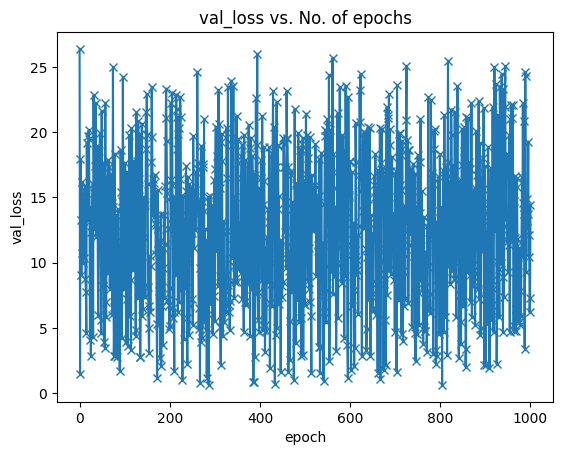

In [21]:
plt.title('val_loss vs. No. of epochs');
loss_mat = [res['val_loss'] for res in [result] + history1]
plt.plot(loss_mat, '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')

val_loss = loss_mat[-1]

In [22]:
epochs = 1000
lr = 1e-3
history2 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [100], val_loss: 1.7559
Epoch [200], val_loss: 1.1005
Epoch [300], val_loss: 1.7201
Epoch [400], val_loss: 0.7011
Epoch [500], val_loss: 0.8442
Epoch [600], val_loss: 1.6102
Epoch [700], val_loss: 1.6827
Epoch [800], val_loss: 1.3695
Epoch [900], val_loss: 0.8749
Epoch [1000], val_loss: 1.3026


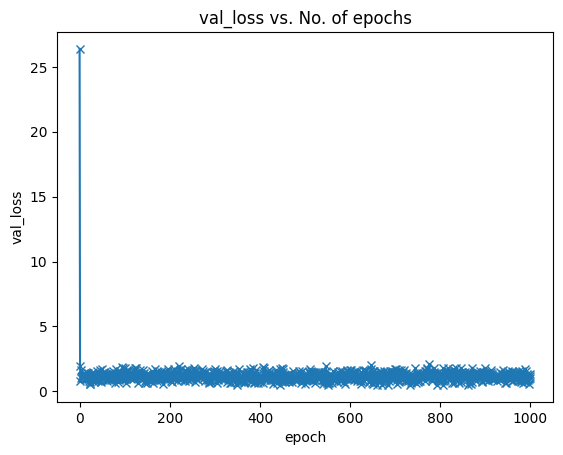

In [23]:
plt.title('val_loss vs. No. of epochs');
loss_mat = [res['val_loss'] for res in [result] + history2]
plt.plot(loss_mat, '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')

val_loss = loss_mat[-1]

In [24]:
epochs = 1000
lr = 1e-4
history3 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [100], val_loss: 0.4838
Epoch [200], val_loss: 0.4822
Epoch [300], val_loss: 0.4821
Epoch [400], val_loss: 0.4831
Epoch [500], val_loss: 0.4865
Epoch [600], val_loss: 0.4812
Epoch [700], val_loss: 0.4829
Epoch [800], val_loss: 0.4812
Epoch [900], val_loss: 0.4807
Epoch [1000], val_loss: 0.4810


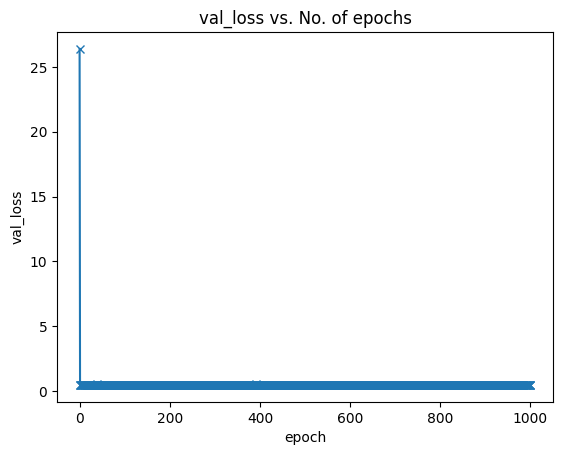

In [25]:
plt.title('val_loss vs. No. of epochs');
loss_mat = [res['val_loss'] for res in [result] + history3]
plt.plot(loss_mat, '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')

val_loss = loss_mat[-1]

In [26]:
epochs = 1000
lr = 1e-5
history4 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [100], val_loss: 0.4806
Epoch [200], val_loss: 0.4806
Epoch [300], val_loss: 0.4806
Epoch [400], val_loss: 0.4807
Epoch [500], val_loss: 0.4806
Epoch [600], val_loss: 0.4808
Epoch [700], val_loss: 0.4808
Epoch [800], val_loss: 0.4805


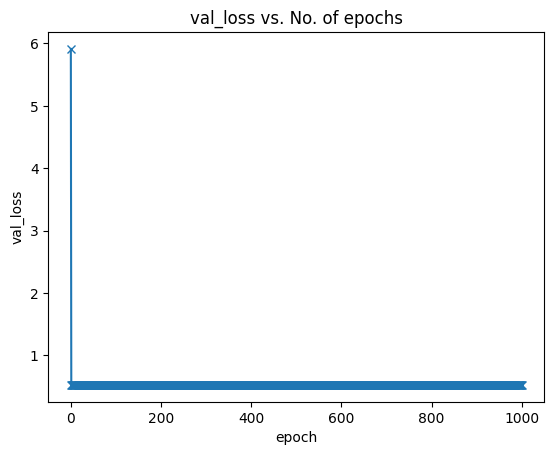

In [ ]:
plt.title('val_loss vs. No. of epochs');
loss_mat = [res['val_loss'] for res in [result] + history4]
plt.plot(loss_mat, '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')

val_loss = loss_mat[-1]

In [ ]:
#model=WineQuality()
epochs = 1500
lr = 1e-6
history5 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [100], val_loss: 0.5275
Epoch [200], val_loss: 0.5274
Epoch [300], val_loss: 0.5274
Epoch [400], val_loss: 0.5274
Epoch [500], val_loss: 0.5274
Epoch [600], val_loss: 0.5274
Epoch [700], val_loss: 0.5274
Epoch [800], val_loss: 0.5274
Epoch [900], val_loss: 0.5274
Epoch [1000], val_loss: 0.5274
Epoch [1100], val_loss: 0.5274
Epoch [1200], val_loss: 0.5274
Epoch [1300], val_loss: 0.5274
Epoch [1400], val_loss: 0.5274
Epoch [1500], val_loss: 0.5274


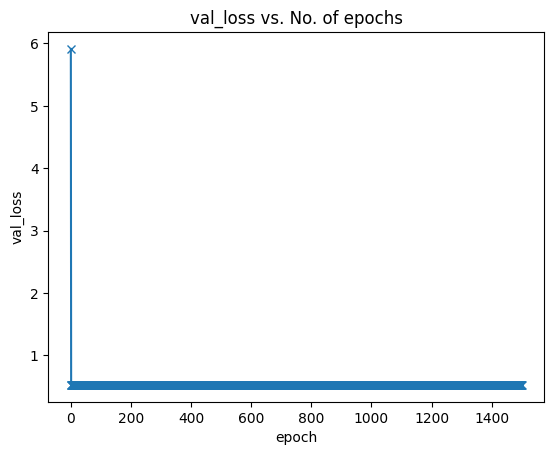

In [ ]:
plt.title('val_loss vs. No. of epochs');
loss_mat = [res['val_loss'] for res in [result] + history5]
plt.plot(loss_mat, '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')

val_loss = loss_mat[-1]

In [ ]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)#???                
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [ ]:
input, target = val_ds[62]
predict_single(input, target, model)

Input: tensor([7.9000e+00, 6.9000e-01, 2.1000e-01, 2.1000e+00, 8.0000e-02, 3.3000e+01,
        1.4100e+02, 9.9620e-01, 3.2500e+00, 5.1000e-01, 9.9000e+00])
Target: tensor([5.])
Prediction: tensor([4.9884])
